Added **BatchNormalization** to see if it improves accuracy.

(60000, 28, 28)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

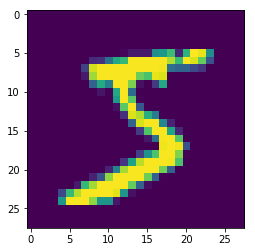

In [3]:
# https://keras.io/
!pip install -q keras
import keras   # This cell is used to import keras.
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add ,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()  #The Keras deep learning library provides a convenience method for loading the MNIST dataset.
                                                           #load (downloaded if needed) the MNIST dataset.

print (X_train.shape)   # Print the shape of the input image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])   # Print the 1st input image
# For a multi-layer perceptron model we must reduce the images down into a vector of pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
# normalize input from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train[:10]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

In [4]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7

model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/i

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 10)        330       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.1269 - acc: 0.9605 - val_loss: 0.0632 - val_acc: 0.9786
Epoch 2/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.0448 - acc: 0.9858 - val_loss: 0.0343 - val_acc: 0.9879
Epoch 3/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.0355 - acc: 0.9885 - val_loss: 0.0406 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.0295 - acc: 0.9909 - val_loss: 0.0359 - val_acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0259 - acc: 0.9917 - val_loss: 0.0305 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0270 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0209 - acc: 0.9934 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [9]:
print(score)

[0.027787998030890593, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [11]:
print(y_pred[:9])
print(y_test[:9])

[[1.48358886e-12 5.41072569e-11 8.07805767e-11 1.36513361e-08
  1.95922723e-15 2.41873600e-12 1.23690134e-13 1.00000000e+00
  1.12489401e-12 2.14201012e-09]
 [8.89964724e-07 3.61529584e-09 9.99999166e-01 8.21905738e-12
  1.09638134e-12 6.47645693e-17 1.23450350e-09 9.70399802e-12
  2.80254764e-10 9.96904057e-13]
 [7.03983787e-08 9.99993920e-01 1.75110387e-07 8.05430204e-07
  3.03815881e-07 2.87471448e-06 1.23139944e-06 7.68294370e-08
  6.39238635e-08 4.57654124e-07]
 [9.99991298e-01 5.35908481e-16 4.87908047e-10 2.62317390e-11
  1.60674317e-12 1.06846823e-11 8.73906720e-06 4.34818067e-12
  9.47193257e-09 1.81051494e-08]
 [5.02284464e-11 1.91213143e-10 3.53724931e-11 5.10890774e-10
  9.99999762e-01 2.69614387e-12 1.81894552e-11 9.42691292e-14
  7.86972015e-11 2.91026481e-07]
 [5.45362555e-09 9.99998093e-01 5.22318011e-08 3.89883361e-08
  3.57253555e-07 4.26785185e-08 1.10941031e-07 7.60281694e-07
  4.71406958e-09 4.87451189e-07]
 [1.82690182e-11 2.53257735e-08 2.54862020e-09 6.40566593e

Accuracy changed form 99.13 to 99.20